In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
a_classified = pd.read_excel('../input/quotient_deviation_df_A_CLASSIFIED.xlsx')
b_classified = pd.read_excel('../input/quotient_deviation_df_B_CLASSIFIED_FIXED.xlsx')

In [19]:
c1 = a_classified[a_classified['Class 4']==0]
c2 = a_classified[a_classified['Class 4']==1]
c3 = a_classified[a_classified['Class 4']==2]
c4 = a_classified[a_classified['Class 4']==3]

In [ ]:
for i in range(1,16):
    plt.boxplot([c1[f'D{i}'], c2[f'D{i}'], c3[f'D{i}'], c4[f'D{i}']])
    plt.title(f'D{i}')
    plt.show()

In [ ]:
for i in range(1,16):
    plt.boxplot([c1[f'CWT{i}'], c2[f'CWT{i}'], c3[f'CWT{i}'], c4[f'CWT{i}']])
    plt.title(f'CWT{i}')
    plt.show()

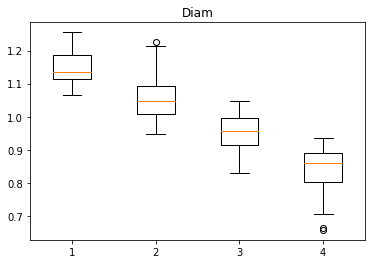

In [29]:
d1 = c1.iloc[:,1:16].mean(axis=1)
d2 = c2.iloc[:,1:16].mean(axis=1)
d3 = c3.iloc[:,1:16].mean(axis=1)
d4 = c4.iloc[:,1:16].mean(axis=1)

plt.boxplot([d1, d2, d3, d4])
plt.title('Diam')
plt.show()

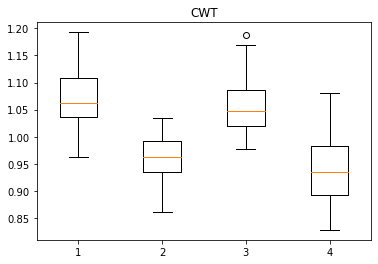

In [31]:
cwt1 = c1.iloc[:,16:31].mean(axis=1)
cwt2 = c2.iloc[:,16:31].mean(axis=1)
cwt3 = c3.iloc[:,16:31].mean(axis=1)
cwt4 = c4.iloc[:,16:31].mean(axis=1)

plt.boxplot([cwt1, cwt2, cwt3, cwt4])
plt.title('CWT')
plt.show()